## 受講される方へ
* 個人PCの持ち込みを必須とさせてください. 
* Numpy, Scipy, Matplotlib, Jupyterノートブックはインストール済みであるとします. 個人的にはAnacondaがお勧めです. 
* 上記のセットアップが難しい場合, 少し早めに会場に来て頂ければお手伝いできるかもしれません. 
* Pythonは未経験でも構いませんが, その他の標準的なプログラミング言語(C, Java, Rubyなど)の経験は前提とします. 
* 数式を確認するため, 紙とペンの準備を推奨します. 

## 参考資料
* 本ノートブックに目を通しておくと良いかもしれません（演習の必要がなくなりそうですが）. 
* 教科書等は特にありませんが, 私が分かりやすいと思った資料を挙げます. 

    - 「多変量正規分布 分散分析第9回講義」土居正明 http://www012.upp.so-net.ne.jp/doi/math/anova/m_normal.pdf
    - 「点推定と最尤原理」浅野 晃 http://racco.mikeneko.jp/Kougi/10a/IS/IS08pr.pdf

## Jupyterノートブックの使用方法
* コンソールで以下のように入力すると, ノートブックサーバーが起動します. 

```
jupyter notebook --notebook-dir=~/Download
```

* すると, 自動的にブラウザ内にノートブックブラウザが表示され, オプション```--notebook-dir```で指定したディレクトリの中身が表示されます. 
* 本ノートブックをダウンロードし, 上記のノートブックブラウザで開きます. 
* ノートブックの各セルの内容を実行するときは```Shift + Enter```を押します. 

## 本演習の内容
本演習では以下のことを学びます. 
* Numpyの基礎
* プロットの基礎
* ベルヌーイ分布からの乱数の生成
* 最尤推定の勾配法による実装
* 多変量正規分布からの乱数の生成
* 確率密度関数のプロット
* サンプルに基づく統計量の計算

## 日程
* 上記の内容を7月と8月の二回に分けて行います. 
* それぞれ1時間半から2時間を想定しています. 

## その他
* 内容が簡単だと思われた方は, そうでない方を積極的にサポートして頂ければありがたいです. 
* このノートブックは演習開始までに更新するかもしれないので, 時々チェックしてください. 

## 初期設定

In [2]:
# 図をインラインで表示するように指定します. 
%matplotlib inline 

import numpy as np # Numpyモジュールをインポートします. as以降でnpという別名を与えます.
import matplotlib.pyplot as plt # Matplotlibモジュールをインポートします. pltという別名を与えます. 
import seaborn as sns # 図を綺麗に表示するモジュールです. このモジュールは省略できます. 

## Numpyの基礎

### 1次元配列 (ベクトル)

In [3]:
a = np.array([1, 2, 3, 4])
print(a) # 中身を表示します. 
print(a.dtype) # 中に入っている数値型
print(type(a)) # 配列自身の型
print(a.shape) # 配列の形 (タプルなので次元が1の場合は最後にカンマが付きます)
print(a.ndim) # 配列の次元
print(dir(a)) # 1次元配列オブジェクトが持つ属性（メソッドも含まれます）

[1 2 3 4]
int64
<class 'numpy.ndarray'>
(4,)
1
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__rmod__',

#### 数値型の変換

In [4]:
a = np.array([1, 2, 3, 4])
b = a.astype('float32')
print(b)
print(b.dtype)

b[0] = 100
print(a)
print(b) # bはaのディープコピーです. 

[ 1.  2.  3.  4.]
float32
[1 2 3 4]
[ 100.    2.    3.    4.]


#### 転置

In [5]:
# 1次元配列に対する転置は何もしません. 
a = np.array([1, 2, 3, 4])
b = a.T
print(b)
print(b.shape)

b[0] = 100
print(a) # bはaのビュー(シャローコピー)です. 
print(b) 

[1 2 3 4]
(4,)
[100   2   3   4]
[100   2   3   4]


#### 統計量

In [6]:
a = np.array([1, 2, 3, 4])
print(a.sum()) # 和
print(a.mean()) # 平均
print(a.std()) # 標準偏差
print(a.min()) # 最小値
print(a.max()) # 最大値

10
2.5
1.11803398875
1
4


#### インデックスの取得

In [7]:
a = np.array([1, 2, 3, 4])
print(a.argmin()) # 最小値のインデックス
print(a.argmax()) # 最大値のインデックス
assert(a[a.argmin()] == a.min())
assert(a[a.argmax()] == a.max())

0
3


#### 加減乗除

In [28]:
# 加減乗除はベクトルの成分ごとに適用されます. 
a = np.array([1, 2, 3])
b = np.array([5, 6, 7])
print(a + b)
print(a - b)
print(a * b)
print(a / b)

[ 6  8 10]
[-4 -4 -4]
[ 5 12 21]
[ 0.2         0.33333333  0.42857143]


#### 内積

In [23]:
a = np.array([1, 2, 3])
b = np.array([5, 6, 7])
print(a.dot(b))
print(a[0] * b[0] + a[1] * b[1] + a[2] * b[2]) # 内積の定義と一致することを確認します. 

38
38


#### 配列生成用関数

In [38]:
print(np.arange(10)) # 10が含まれないことに注意します. 
print(np.arange(5, 15, 2))
print(np.zeros(3))
print(np.ones(3))

[0 1 2 3 4 5 6 7 8 9]
[ 5  7  9 11 13]
[ 0.  0.  0.]
[ 1.  1.  1.]


#### スライス

In [33]:
a = np.arange(10)
print(a[:4]) # 最初の4成分
print(a[4:]) # 最初の4成分以降
print(a[-4:]) # 最後の4成分
print(a[::2]) # 2つずつ飛ばす. 

[0 1 2 3]
[4 5 6 7 8 9]
[6 7 8 9]
[0 2 4 6 8]


### 2次元配列 (行列)

In [37]:
a = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12]]) # リストのリストを引数に与えます. 
print(a)
print(a.shape) # 1次元の場合と同じくタプルです. 
print(a.ndim)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
2


#### 1次元配列と2次元配列の間の変換

In [40]:
a = np.arange(1, 13) # 1から12までの1次元配列
b = a.reshape(3, 4) # 1D -> 2D
c = b.ravel() # 2D -> 1D. 3次元以上の配列も1次元に変換されます. 
print(a)
print(b)
print(c)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


#### 行列とベクトルの積
\begin{eqnarray}
A = \left[
 \begin{array}{ccc}
      1 & 2 \\
      3 & 4
    \end{array}
\right], 
b = [5, 6]
\end{eqnarray}

ndarrayでは行ベクトルと列ベクトルは同じ形を取ります. $bA$を計算する場合bは行ベクトルとして解釈され, $Ab$を計算する場合は列ベクトルとして解釈されます. 

In [43]:
a = np.arange(4).reshape(2, 2)
b = np.array([5, 6])
c = a.dot(b) # 一般にAB!=BAです. 
d = b.dot(a) # 上の行の結果と一致しません.
print(a)
print(b)
print(c)
print(d)

[[0 1]
 [2 3]]
[5 6]
[ 6 28]
[12 23]


#### 単位行列

In [44]:
a = np.eye(2)
b = np.array([5, 6])
print(a.dot(b)) # 単位行列を掛けても値は変化しません. 
print(b.dot(a))

[ 5.  6.]
[ 5.  6.]


#### 行列同士の積

In [47]:
a = np.arange(4).reshape(2, 2)
b = np.arange(8).reshape(2, 4)
c = a.dot(b)
print(a)
print(b)
print(c)

# エラー
d = b.dot(a) # 左の行列(b)の列数と右の行列(a)の行数が一致しません. 

[[0 1]
 [2 3]]
[[0 1 2 3]
 [4 5 6 7]]
[[ 4  5  6  7]
 [12 17 22 27]]


ValueError: shapes (2,4) and (2,2) not aligned: 4 (dim 1) != 2 (dim 0)

#### 逆行列

In [50]:
a = np.arange(9).reshape(3, 3) + np.eye(3)
b = np.linalg.inv(a)
c = a.dot(b)
d = b.dot(a)
print(a)
print(b)
print(c)
print(d)

[[ 1.  1.  2.]
 [ 3.  5.  5.]
 [ 6.  7.  9.]]
[[-2.  -1.   1. ]
 [-0.6  0.6 -0.2]
 [ 1.8  0.2 -0.4]]
[[  1.00000000e+00  -2.22044605e-16   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -4.44089210e-16   1.00000000e+00]]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -4.44089210e-16   1.00000000e+00]]


## プロットの基礎

### 散布図とグラフ

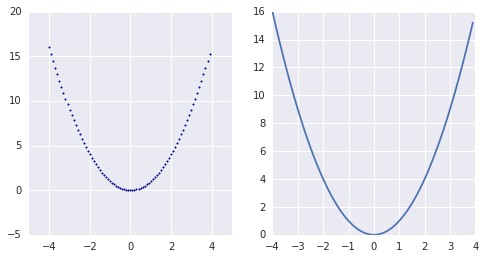

In [57]:
x = np.arange(-4, 4, 0.1)
y = x**2 # y=x^2

# Figureオブジェクトを準備します. 
fig = plt.figure(figsize=(8, 4)) # 横幅10, 縦幅5

# 散布図
ax1 = fig.add_subplot(121) # Figureオブジェクトの中にAxesオブジェクトを準備します. 
ax1.scatter(x, y, marker='.', s=10) # sはマーカーのサイズ

# グラフ
ax2 = fig.add_subplot(122) # Axesの数が1行2列, 末尾の数字はその2番目を意味します. 
ax2.plot(x, y);

### 等高線図
メッシュを生成し, その座標値で関数を計算してプロットします. 

In [58]:
# メッシュの作成
x_ = np.arange(-4, 4, 0.05)
y_ = np.arange(-4, 4, 0.05)
x, y = np.meshgrid(x_, y_)
print(x_.shape)
print(y_.shape)
print(x.shape)
print(y.shape)
print(x[:5, :5])
print(y[:5, :5])

(160,)
(160,)
(160, 160)
(160, 160)
[[-4.   -3.95 -3.9  -3.85 -3.8 ]
 [-4.   -3.95 -3.9  -3.85 -3.8 ]
 [-4.   -3.95 -3.9  -3.85 -3.8 ]
 [-4.   -3.95 -3.9  -3.85 -3.8 ]
 [-4.   -3.95 -3.9  -3.85 -3.8 ]]
[[-4.   -4.   -4.   -4.   -4.  ]
 [-3.95 -3.95 -3.95 -3.95 -3.95]
 [-3.9  -3.9  -3.9  -3.9  -3.9 ]
 [-3.85 -3.85 -3.85 -3.85 -3.85]
 [-3.8  -3.8  -3.8  -3.8  -3.8 ]]


In [59]:
# 表示する関数の値の計算
z = x**2 + y**2
print(z.shape)
print(z.min(), z.max())

(160, 160)
4.03896783473e-28 32.0


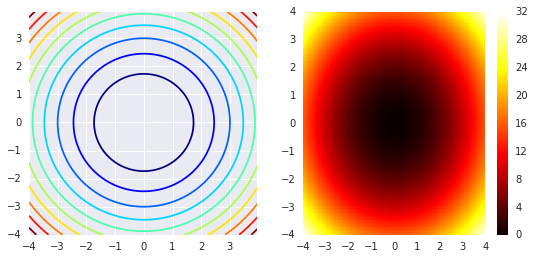

In [80]:
fig = plt.figure(figsize=(9, 4))

# 等高線図
plt.jet() # jetカラーマップ
ax1 = fig.add_subplot(121)
ax1.contour(x, y, z, 10) # 最後の数値は等高線の数です. 

plt.hot() # hotカラーマップ
ax2 = fig.add_subplot(122)
h = ax2.pcolor(x, y, z)
plt.colorbar(h);